In [94]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [95]:
df = pd.read_excel(r'C:\Users\GabrielMedina\Desktop\Gitizin\tabela_aluguel_studios.xlsx')
df.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
1,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29
4,23,2472749891,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,0,850,3500,41,1,1,1,1,85.37


In [96]:
df.shape

(47587, 16)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47587 non-null  int64  
 1   Id_Oferta         47587 non-null  int64  
 2   Portal            47587 non-null  object 
 3   Bairro            47587 non-null  object 
 4   Zona              47587 non-null  object 
 5   Cidade            47587 non-null  object 
 6   Status            47587 non-null  object 
 7   Valor_Iptu        47587 non-null  int64  
 8   Valor_Condominio  47587 non-null  int64  
 9   Valor_Aluguel     47587 non-null  int64  
 10  Area_Privativa    47587 non-null  int64  
 11  Dormitorios       47587 non-null  int64  
 12  Suites            47587 non-null  int64  
 13  Vagas             47587 non-null  int64  
 14  Banheiros         47587 non-null  int64  
 15  Aluguel_m2        47584 non-null  float64
dtypes: float64(1), int64(10), object(5)
memo

In [98]:
df.describe()

,Unnamed: 0,Id_Oferta,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
count,47587.000000,4.758700e+04,4.758700e+04,4.758700e+04,47587.000000,47587.000000,47587.0,47587.000000,47587.000000,47587.000000,47584.000000
mean,106372.379810,2.464614e+09,8.408286e+02,1.149685e+03,3554.135940,58.858134,1.0,0.332339,0.938029,1.195999,65.364296
std,64262.443364,1.909567e+08,8.123393e+04,3.182012e+04,10411.708176,296.713165,0.0,0.477789,1.869217,0.785231,227.014436
min,1.000000,4.216065e+07,0.000000e+00,0.000000e+00,100.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.060000
25%,53686.500000,2.478920e+09,1.000000e+00,3.400000e+02,1611.000000,35.000000,1.0,0.000000,0.000000,1.000000,40.000000
50%,101742.000000,2.486492e+09,9.800000e+01,5.460000e+02,2350.000000,42.000000,1.0,0.000000,1.000000,1.000000,55.560000
75%,150312.000000,2.493186e+09,1.800000e+02,8.000000e+02,3300.000000,50.000000,1.0,1.000000,1.000000,1.000000,75.000000
max,227358.000000,2.500724e+09,1.750021e+07,5.200074e+06,680000.000000,60000.000000,1.0,10.000000,130.000000,40.000000,18242.650000


In [99]:
df.isna().any().sum()

1

In [100]:
df.dropna(inplace=True)
df.isna().any().sum()

0

In [101]:
list(df['Bairro'].unique())

['Jaguaré',
 'Ponte Pequena',
 'Brooklin',
 'Campos Elíseos',
 'Indianópolis',
 'Itaim Bibi',
 'Vila Suzana',
 'Vila Nova Conceição',
 'Liberdade',
 'Cambuci',
 'Consolação',
 'Bela Vista',
 'Mirandópolis',
 'Jardim Monte Kemel',
 'Chácara Santo Antônio (Zona Leste)',
 'Vila Olímpia',
 'Limao',
 'Parque Industrial Tomas Edson',
 'Sé',
 'Pinheiros',
 'Vila Invernada',
 'Vila Leopoldina',
 'Centro Histórico de São Paulo',
 'Cerqueira César',
 'Canindé',
 'Moema',
 'Santo Amaro',
 'Lapa',
 'Ibirapuera',
 'Sumarezinho',
 'Jardins',
 'Paraíso',
 'Brás',
 'Jardim Ampliação',
 'Vila Clementino',
 'Jardim Paulista',
 'Alto da Mooca',
 'Vila Regente Feijó',
 'Campo Belo',
 'Vila Siqueira (Zona Norte)',
 'Jardim da Glória',
 'Várzea da Barra Funda',
 'Parque da Mooca',
 'Catumbi',
 'Vila Mascote',
 'Vila Água Funda',
 'Sumaré',
 'Santana',
 'Tatuapé',
 'Super Quadra Morumbi',
 'Vila Uberabinha',
 'Saúde',
 'República',
 'Jardim Londrina',
 'Vila Mariana',
 'Mooca',
 'Vila Fachini',
 'Freguesia d

In [102]:
df = df.replace({'Aclimação': 'Liberdade'})

In [103]:
dflbd = df[df['Bairro'] == 'Liberdade']
dflbd

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
8,59,2476465605,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10
9,62,2476467685,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,67,150,3142,20,1,0,0,1,157.10
24,133,2475049573,Zap Imóveis,Liberdade,Zona Sul,São Paulo,Aluguel,2300,4500,21500,234,1,0,6,4,91.88
43,290,2477568209,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,200,830,2300,43,1,0,1,1,53.49
65,393,2480229486,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,521,1700,23,1,0,0,1,73.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47294,225931,2500210731,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,270,1100,44,1,0,0,1,25.00
47314,226050,2500233697,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,100,0,1700,78,1,0,0,1,21.79
47363,226263,2500292903,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,75,678,2200,60,1,0,1,1,36.67
47364,226264,2500292906,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,270,1300,25,1,0,0,1,52.00


In [104]:
dflbd['Area_Privativa'].describe()

count    1802.000000
mean       39.669256
std        49.285325
min        10.000000
25%        28.000000
50%        36.000000
75%        45.000000
max      1614.000000
Name: Area_Privativa, dtype: float64

In [105]:
dflbd['Aluguel_m2'].describe()

count    1802.000000
mean       53.507936
std       155.977340
min         0.770000
25%        33.330000
50%        46.670000
75%        62.500000
max      6607.140000
Name: Aluguel_m2, dtype: float64

<Figure size 2160x720 with 0 Axes>

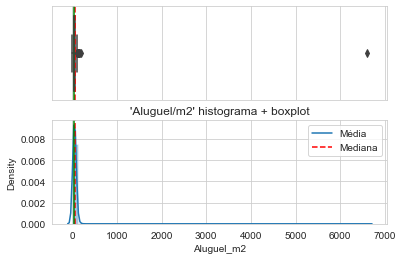

In [125]:
# Verificando a distribuição dos dados na tabela antes de tratada

aluguelm2 = dflbd.Aluguel_m2
plt.figure(figsize=(30,10))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (2.0, 2.2)})
mean=np.array(aluguelm2).mean()
median=np.median(aluguelm2)
sns.boxplot(aluguelm2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(aluguelm2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Média':mean,'Mediana':median})
plt.title("'Aluguel/m2' histograma + boxplot")
ax_box.set(xlabel='')
plt.show()

In [106]:
# Analisando os limites inefriores e superiores das variáveis de aluguel e área

In [107]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

In [108]:
limites(dflbd['Area_Privativa'])

(2.5, 70.5)

In [109]:
limites(dflbd['Aluguel_m2'])

(-10.425000000000004, 106.255)

In [110]:
limites(dflbd['Valor_Aluguel'])

(250.0, 3050.0)

In [111]:
# Coletando a mediana e o Q3 da tabela df para cercear o estudo nos imóveis entre os Q2 e Q3

med = np.percentile(dflbd.Aluguel_m2, 50)
q3 = np.percentile(dflbd.Aluguel_m2, 75)
print(med)
print(q3)

46.67
62.5


In [112]:
lbd_ = dflbd[(dflbd.Aluguel_m2 >= med) & (dflbd.Aluguel_m2 <= q3)]
df_lbd = pd.DataFrame(data=lbd_)
display(df_lbd)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
43,290,2477568209,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,200,830,2300,43,1,0,1,1,53.49
214,1143,2477610893,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,450,2470,41,1,0,0,1,60.24
810,4315,2476465948,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,0,1200,20,1,0,0,1,60.00
1345,7298,2478652576,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,21,701,1900,39,1,1,1,1,48.72
1438,7815,2473212781,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,110,500,2000,40,1,0,1,1,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47044,224790,2499908633,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,25,0,1600,30,1,1,0,1,53.33
47125,225140,2500037175,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,145,267,1063,19,1,1,0,1,55.95
47133,225200,2500048114,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,650,1800,35,1,1,1,1,51.43
47265,225789,2500179668,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,100,600,2600,45,1,0,1,1,57.78


In [113]:
df_lbd['Area_Privativa'].describe()

count    464.000000
mean      34.566810
std       12.110536
min       16.000000
25%       28.000000
50%       32.000000
75%       40.000000
max      150.000000
Name: Area_Privativa, dtype: float64

In [114]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

areap = limites(df_lbd['Area_Privativa'])
areap

(10.0, 58.0)

In [115]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

areap = limites(df_lbd['Area_Privativa'])
areap

(10.0, 58.0)

In [116]:
df_lbd = df_lbd[df_lbd.Area_Privativa <= areap[1]]
df_lbd

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
43,290,2477568209,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,200,830,2300,43,1,0,1,1,53.49
214,1143,2477610893,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,450,2470,41,1,0,0,1,60.24
810,4315,2476465948,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,0,1200,20,1,0,0,1,60.00
1345,7298,2478652576,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,21,701,1900,39,1,1,1,1,48.72
1438,7815,2473212781,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,110,500,2000,40,1,0,1,1,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47044,224790,2499908633,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,25,0,1600,30,1,1,0,1,53.33
47125,225140,2500037175,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,145,267,1063,19,1,1,0,1,55.95
47133,225200,2500048114,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,0,650,1800,35,1,1,1,1,51.43
47265,225789,2500179668,Zap Imóveis,Liberdade,Centro,São Paulo,Aluguel,100,600,2600,45,1,0,1,1,57.78


<Figure size 2160x720 with 0 Axes>

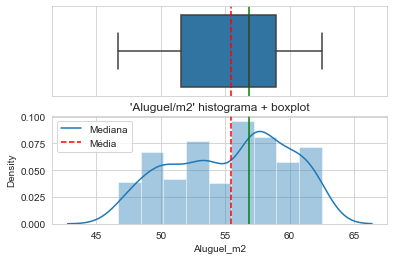

In [126]:
# Verificando a distribuição dos dados na tabela processada


aluguelm2 = df_lbd.Aluguel_m2
plt.figure(figsize=(30,10))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1.0, 1.2)})
mean=np.array(aluguelm2).mean()
median=np.median(aluguelm2)
sns.boxplot(aluguelm2, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(aluguelm2, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mediana':median,'Média':mean})
plt.title("'Aluguel/m2' histograma + boxplot")
ax_box.set(xlabel='')
plt.show()

Distribuição assimétrica das variáveis com a mediana maior que a média. Inclinação negativa.

<Figure size 1440x720 with 0 Axes>

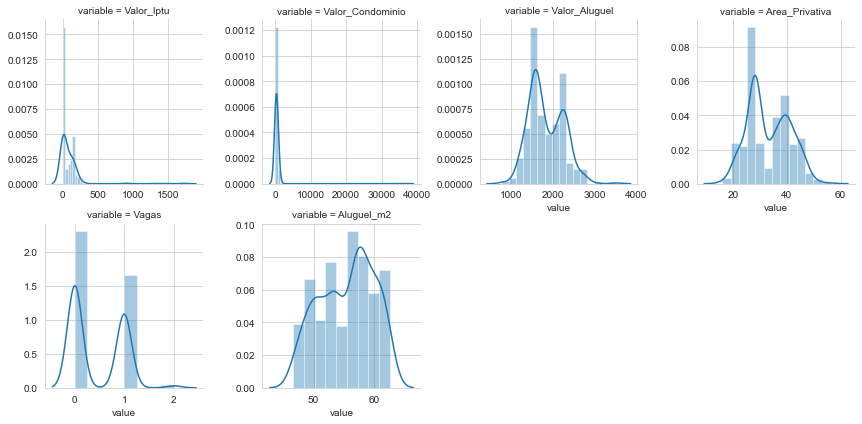

In [127]:
# Verificando a distribuição por histogramas das variáveis numéricas

def hist_col_num(df, col_num):
    '''
    Pega o dataframe, as colunas numéricas como lista
    Retorna um grupo de histogramas com  elas
    
    '''
    f = pd.melt(df, value_vars=col_num) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

plt.figure(figsize=(20,10))
hist_col_num(df_lbd, df_lbd[['Valor_Iptu', 'Valor_Condominio', 'Valor_Aluguel', 'Area_Privativa', 'Vagas', 'Aluguel_m2']])

In [118]:
# Agrupamento das métricas correspondentes a cada metragem quadrada do imóvel e o aluguel/m²

datalbd = df_lbd.groupby(['Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
datalbd.replace(np.nan, 0, inplace=True)
display(datalbd)

,min,max,mean,std,size
Area_Privativa,,,,,
16,48.75,53.69,51.220000,3.493107,2
18,59.44,59.44,59.440000,0.000000,1
19,55.95,60.53,58.240000,3.238549,2
20,53.15,62.50,57.412500,4.560405,4
21,59.52,61.90,61.186000,1.149649,10
22,50.91,61.36,59.232632,3.415996,19
23,49.91,60.87,56.510000,4.370080,7
24,50.00,50.00,50.000000,0.000000,1
25,48.00,62.00,56.956522,4.399569,23


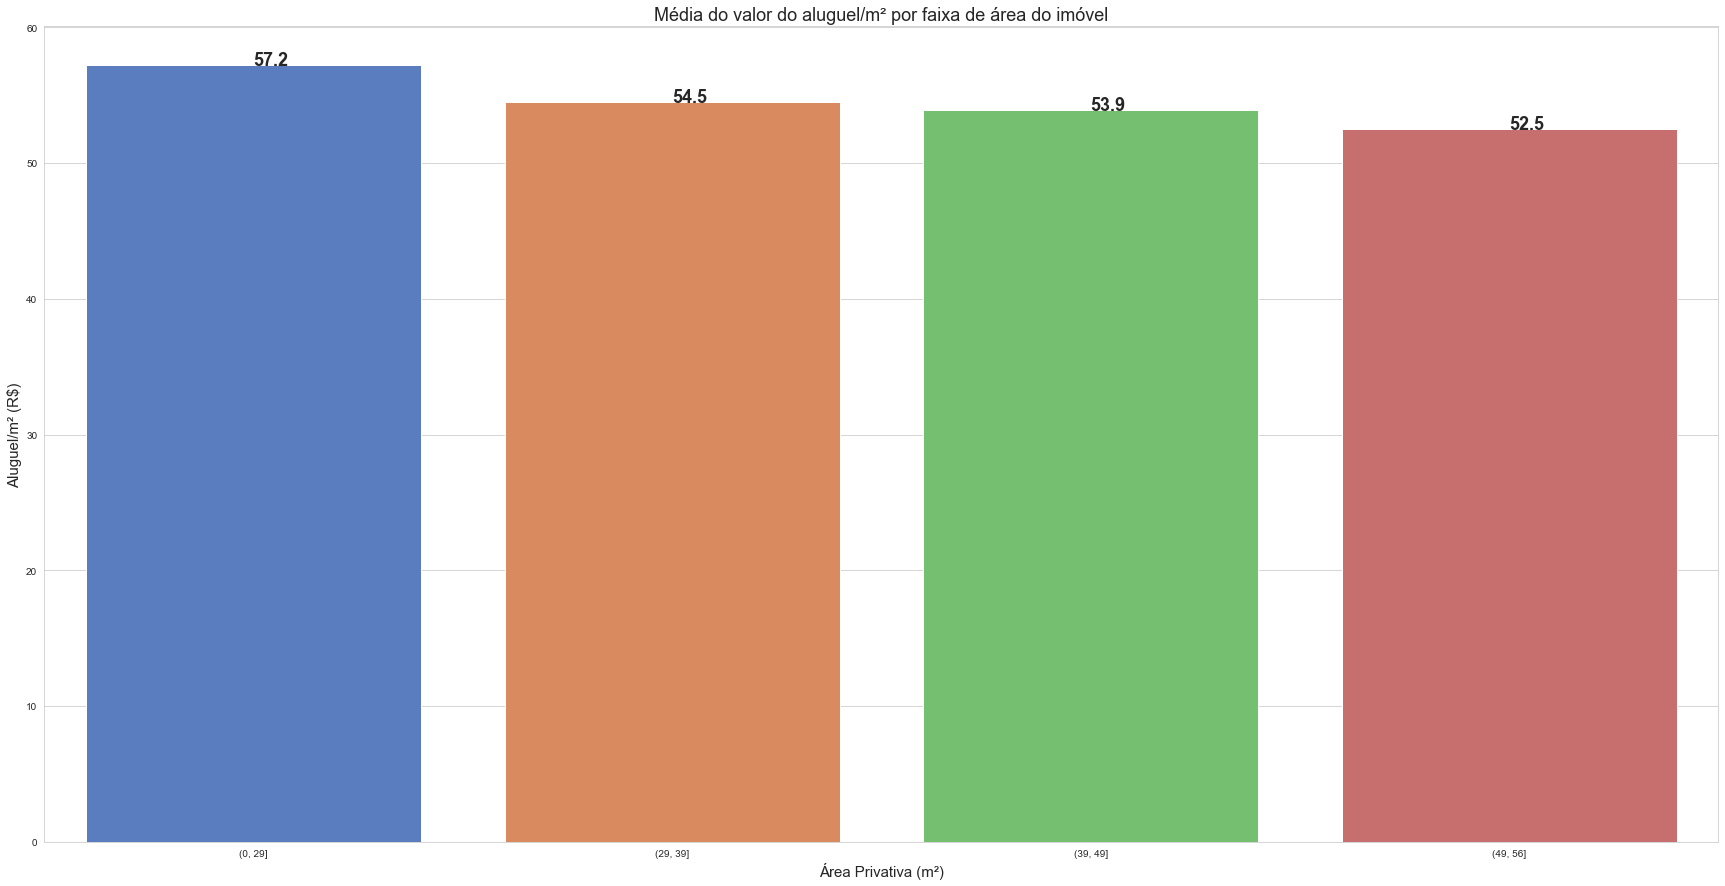

In [128]:
# Agrupando as médias de aluguel/m² em faixas de área privativa

dfbx = df_lbd.groupby(pd.cut(df_lbd['Area_Privativa'], [0, 29, 39, 49, 56])).agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

# Verificando a média de aluguel por m2 por faixas de área privativa

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=dfbx.index, y='media', data=dfbx, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por faixa de área do imóvel", fontsize=18)
ax.set_xlabel("Área Privativa (m²)", fontsize=15)
ax.set_ylabel("Aluguel/m² (R$)", fontsize=15)

# calculando médias e plotando no barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), fontsize = 18, weight='bold' )

In [119]:
# Agrupamento das métricas correspondentes a cada metragem quadrada do imóvel e o aluguel total

datalbd_ = df_lbd.groupby(['Area_Privativa']).Valor_Aluguel.agg(['min', 'max', 'mean', 'std', 'size'])
datalbd_.replace(np.nan, 0, inplace=True)
display(datalbd_)

,min,max,mean,std,size
Area_Privativa,,,,,
16,780,859,819.500000,55.861436,2
18,1070,1070,1070.000000,0.000000,1
19,1063,1150,1106.500000,61.518290,2
20,1063,1250,1148.250000,91.208095,4
21,1250,1300,1285.000000,24.152295,10
22,1120,1350,1303.157895,75.207316,19
23,1148,1400,1299.714286,100.501599,7
24,1200,1200,1200.000000,0.000000,1
25,1200,1550,1423.913043,109.989220,23


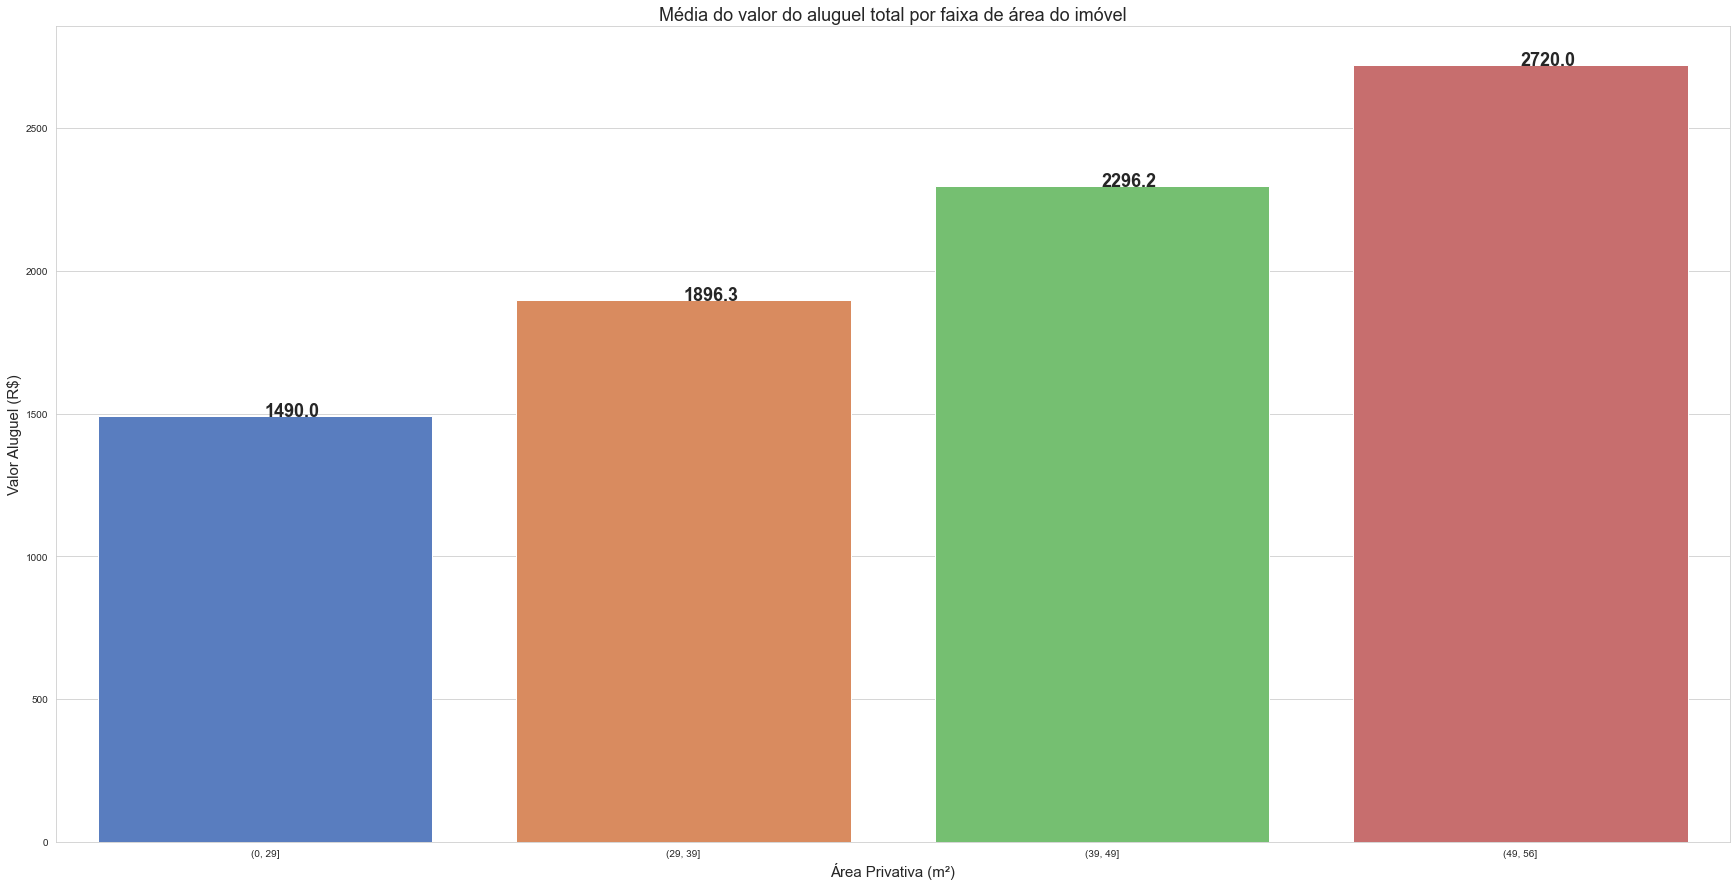

In [129]:
# Agrupando as médias de aluguel em faixas de área privativa

dfbx_ = df_lbd.groupby(pd.cut(df_lbd['Area_Privativa'], [0, 29, 39, 49, 56])).agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

# Verificando a média de aluguel por faixas de área privativa

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=dfbx_.index, y='media', data=dfbx_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel total por faixa de área do imóvel", fontsize=18)
ax.set_xlabel("Área Privativa (m²)", fontsize=15)
ax.set_ylabel("Valor Aluguel (R$)", fontsize=15)

# calculando médias e plotando no barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), fontsize = 18, weight='bold' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '16'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '50'),
  Text(31, 0, '52'),
  Text(32, 0, '56')])

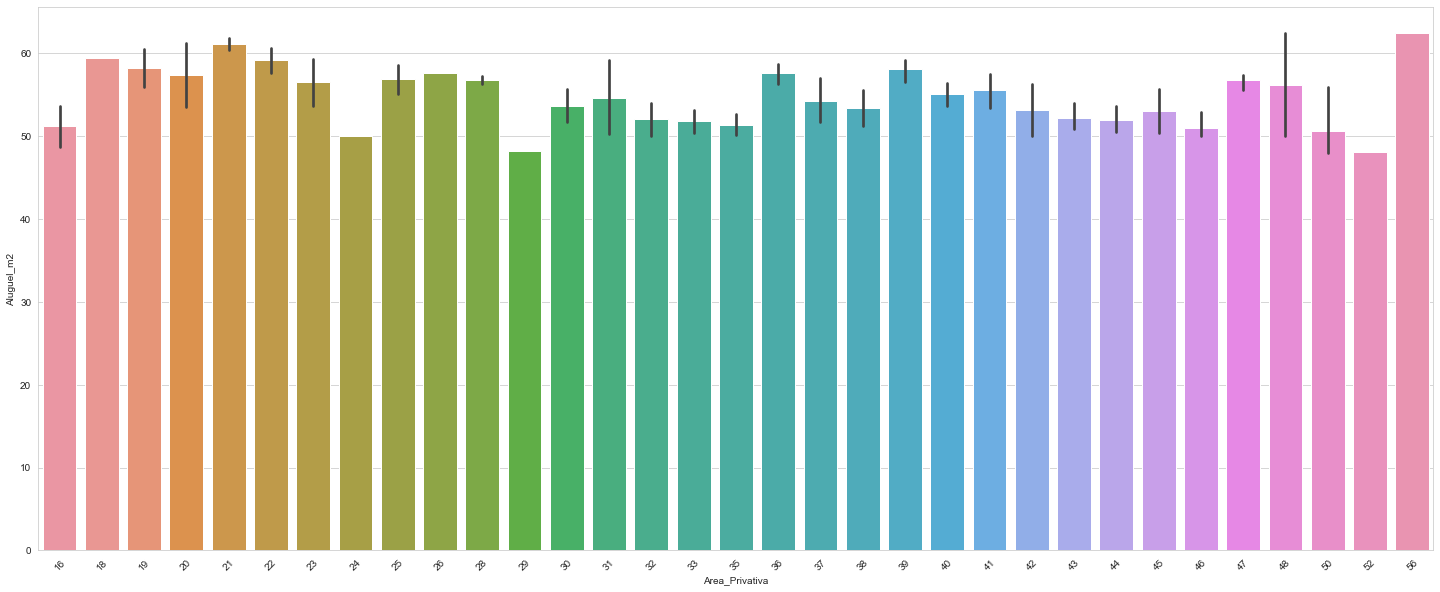

In [122]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_lbd['Area_Privativa'], y = df_lbd['Aluguel_m2'])
plt.xticks(rotation=45)

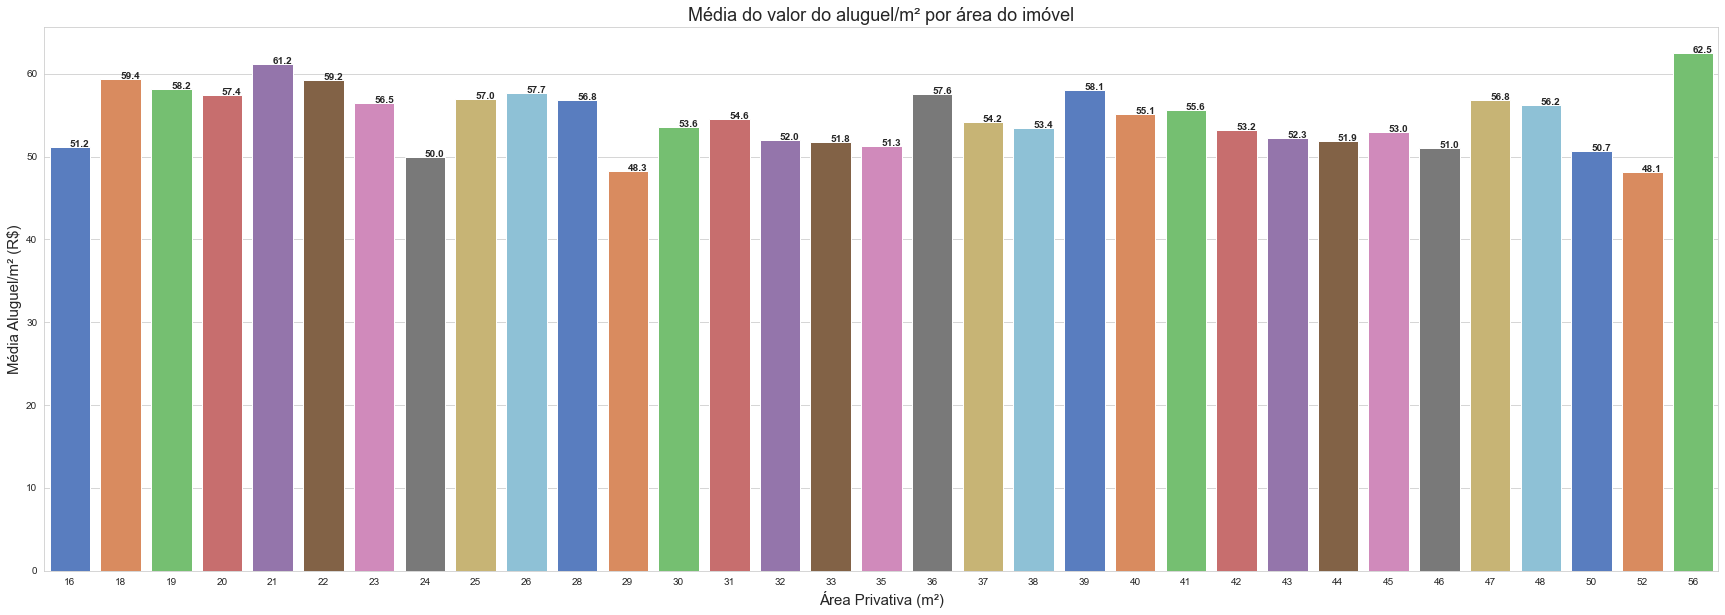

In [123]:
data_lbd = df_lbd.groupby('Area_Privativa').agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x=data_lbd.index, y='media', data=data_lbd, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Média Aluguel/m² (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

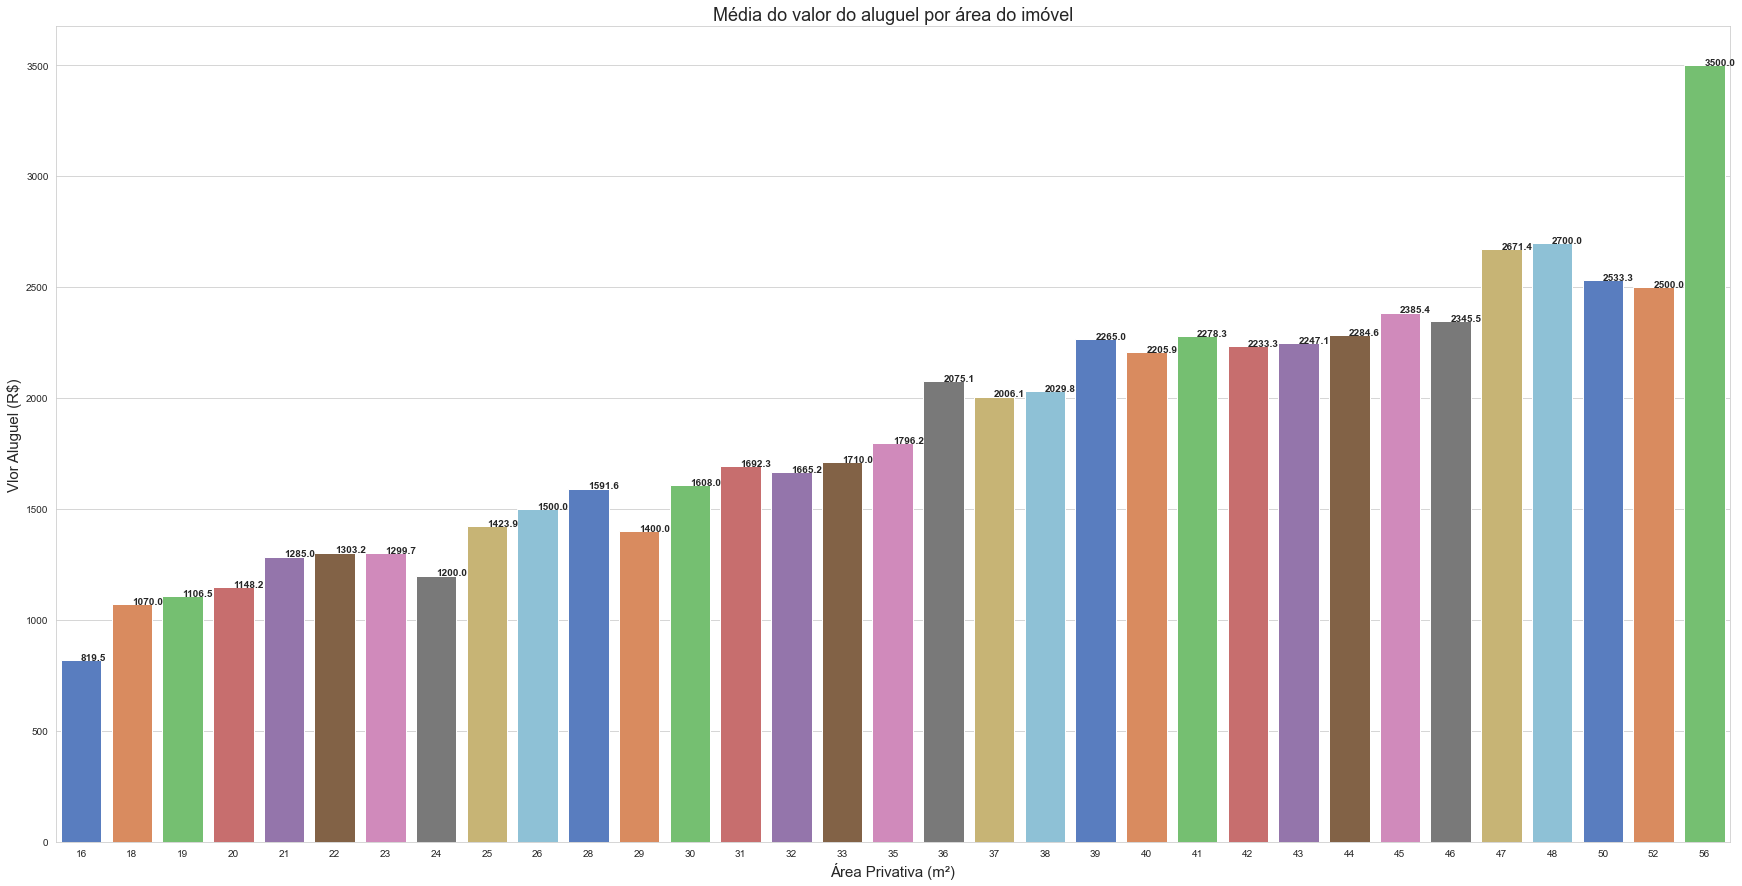

In [124]:
data_lbd_ = df_lbd.groupby('Area_Privativa').agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=data_lbd_.index, y='media', data=data_lbd_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Vlor Aluguel (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )